This notebook adds lag features and prepares the data for basic regression and classification models.

In [1]:
import pickle
import pandas as pd
import numpy as np
with open('check2.pkl','rb') as picfile:
    data = pickle.load(picfile)

In [2]:
for i in range(10):
    data[i].reset_index(inplace=True)

In [3]:
for i in range(10):
    del data[i]['index']

In [7]:
data[3].head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime
0,BMW,92.36,92.36,91.93,91.93,14755,80,2018-02-01 08:00:00
1,BMW,91.94,92.24,91.94,92.18,5059,29,2018-02-01 08:01:00
2,BMW,92.22,92.22,92.06,92.10,10484,51,2018-02-01 08:02:00
3,BMW,92.00,92.09,91.98,91.99,4703,34,2018-02-01 08:03:00
4,BMW,92.02,92.27,92.02,92.18,3906,25,2018-02-01 08:04:00


Text(0,0.5,'Price')

/Users/subramanianiyer/anaconda2/envs/mypython3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


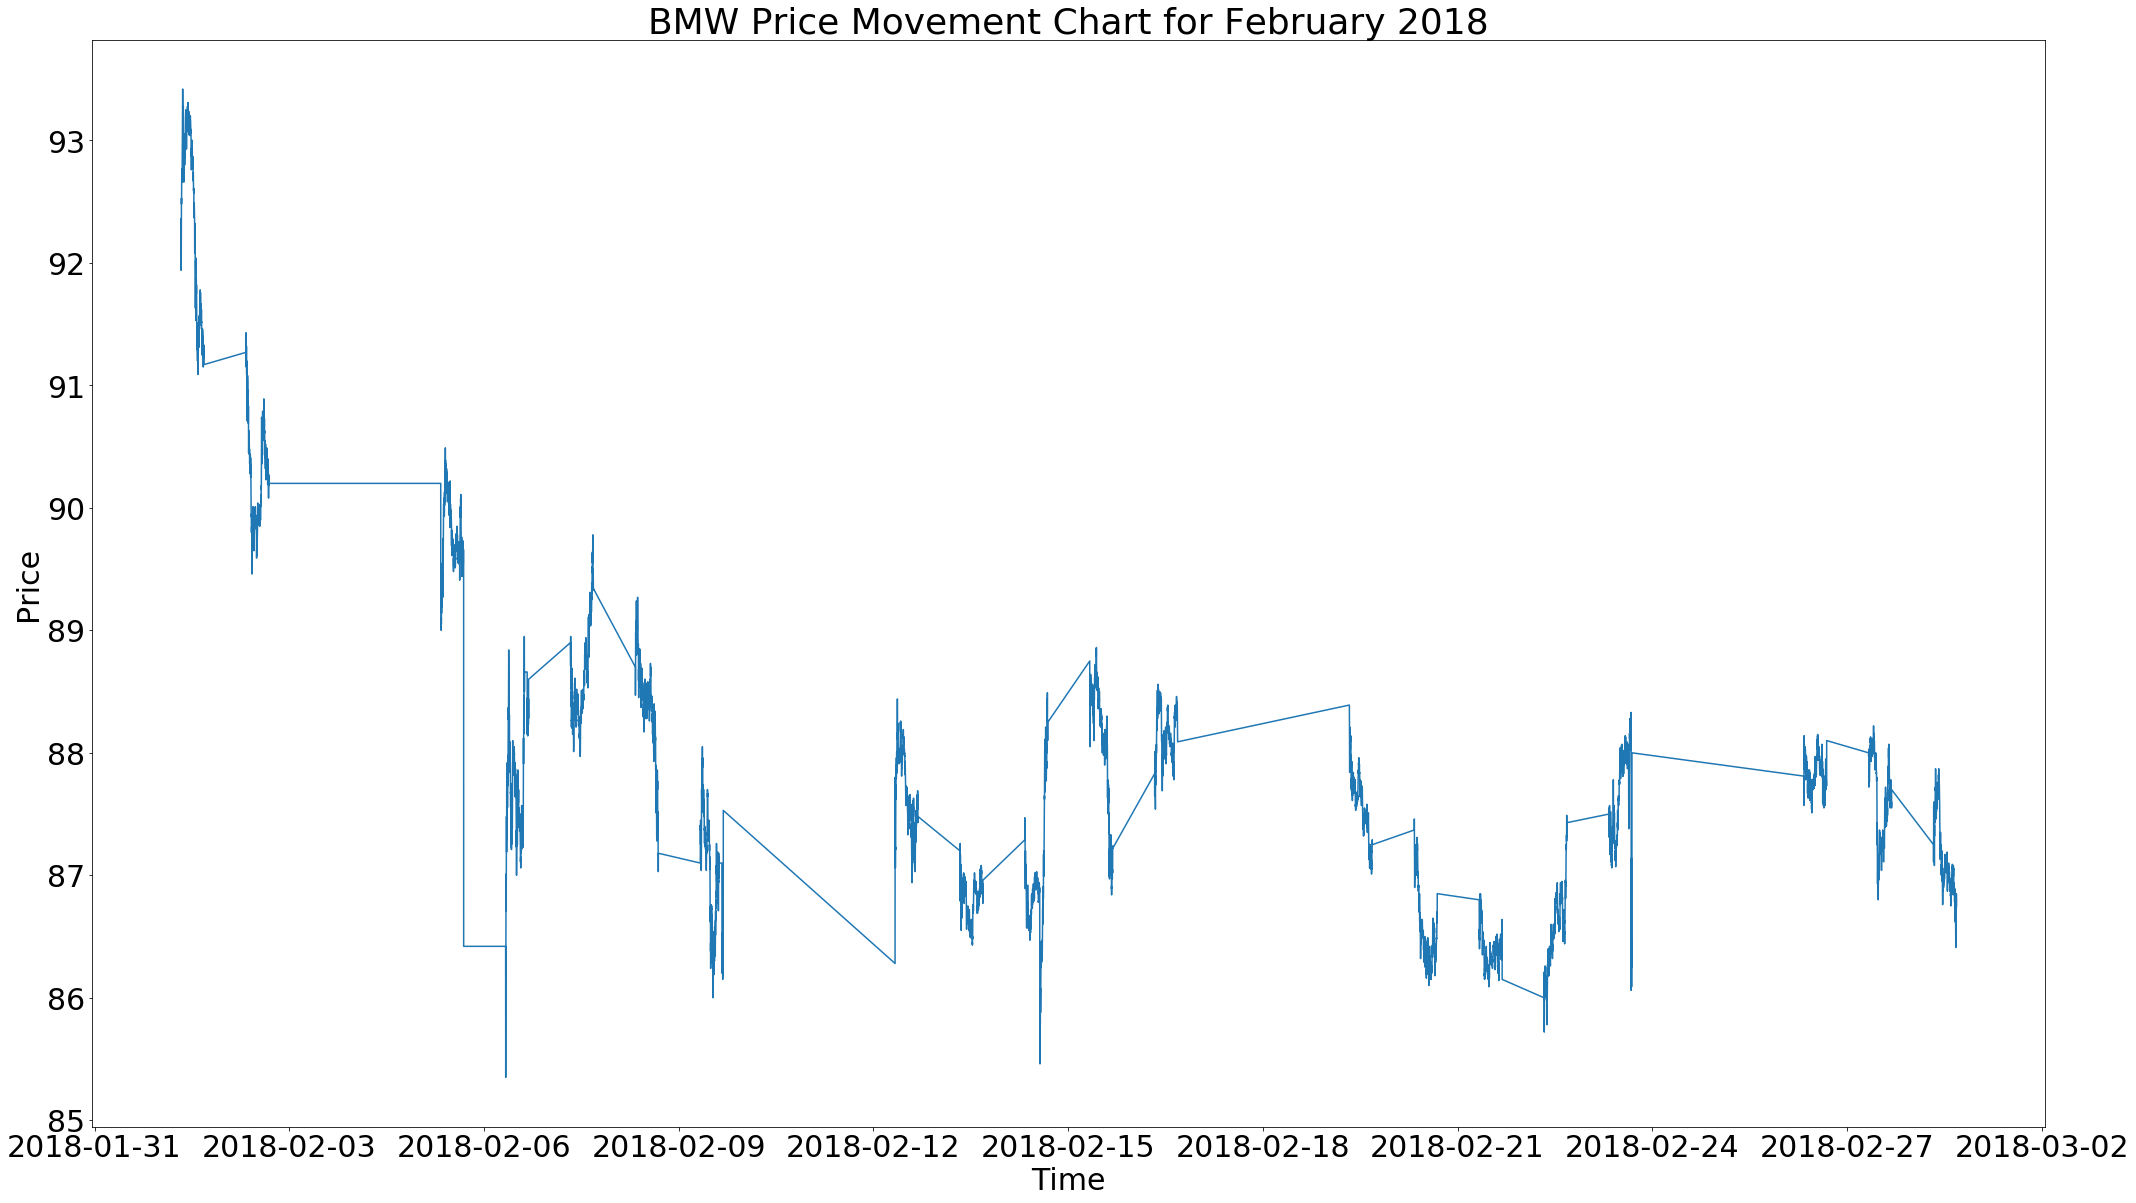

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig = plt.figure(figsize = (35,20))
i = 3
plt.plot(data[i]['DateTime'],data[i]['StartPrice'])
plt.title('BMW Price Movement Chart for February 2018');
plt.xlabel('Time')
plt.ylabel('Price')

In [48]:
dfs = []
for i in data:
    i['logSP'] = [np.log(x) for x in i['StartPrice']]
    i['logEP'] = [np.log(x) for x in i['EndPrice']]
    i['logMax'] =[np.log(x) for x in i['MaxPrice']]
    i['logMin'] = [np.log(x) for x in i['MinPrice']]
    dfs.append(i)

In [7]:
dfs[0].head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime,logSP,logEP,logMax,logMin
0,BAS,94.77,94.83,94.75,94.75,7676,49,2018-02-01 08:00:00,4.551453,4.551242,4.552086,4.551242
1,BAS,94.70,94.70,94.59,94.59,1935,17,2018-02-01 08:01:00,4.550714,4.549552,4.550714,4.549552
2,BAS,94.63,94.75,94.61,94.75,5429,31,2018-02-01 08:02:00,4.549975,4.551242,4.551242,4.549763
3,BAS,94.76,94.77,94.69,94.73,3582,44,2018-02-01 08:03:00,4.551347,4.551031,4.551453,4.550608
4,BAS,94.71,94.72,94.66,94.69,8392,46,2018-02-01 08:04:00,4.550820,4.550608,4.550925,4.550292


In [49]:
dfsnew = []
for j in data:
    j['TVPrior'] = j['TradedVolume'].shift(1)
    j['NTPrior'] = j['NumberOfTrades'].shift(1)
    j['logC'] = [x-y for x,y in zip(j['logEP'],j['logSP'])]
    j['deLogSP'] = [x-y for x,y in zip(j['logSP'], j['logSP'].shift(1))]
    j['deLogEP'] = [x-y for x,y in zip(j['logEP'], j['logEP'].shift(1))]
    j['deLogMax'] = [x-y for x,y in zip(j['logMax'], j['logMax'].shift(1))]
    j['deLogMin'] = [x-y for x,y in zip(j['logMin'], j['logMin'].shift(1))]
    dfsnew.append(j)

In [26]:
print(dfsnew[0].head(3))

  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice  TradedVolume  \
0      BAS       94.77     94.83     94.75     94.75          7676   
1      BAS       94.70     94.70     94.59     94.59          1935   
2      BAS       94.63     94.75     94.61     94.75          5429   

   NumberOfTrades            DateTime     logSP     logEP    ...     \
0              49 2018-02-01 08:00:00  4.551453  4.551242    ...      
1              17 2018-02-01 08:01:00  4.550714  4.549552    ...      
2              31 2018-02-01 08:02:00  4.549975  4.551242    ...      

   deLogMin479  deLogSPL480  deLogEPL480  deLogMax480  deLogMin480  deLogSPL1  \
0          0.0          0.0          0.0          0.0          0.0   0.000000   
1          0.0          0.0          0.0          0.0          0.0   0.000000   
2          0.0          0.0          0.0          0.0          0.0  -0.000528   

   deLogEPL1  deLogMax1  deLogMin1      logC  
0    0.00000   0.000000    0.00000 -0.000211  
1    0.00000   

In [50]:
suffixes = [str(x) for x in range(1,31)]
shifts = list(range(1,31))
dfsnew2 = []
for j in dfsnew:
    for i in range(30):
        j['TVLag'+suffixes[i]] = j['TVPrior'].shift(shifts[i])
        j['NTLag'+suffixes[i]] = j['NTPrior'].shift(shifts[i])
        j['logCL'+suffixes[i]] = j['logC'].shift(shifts[i])
        j['deLogSPL'+suffixes[i]] = j['deLogSP'].shift(shifts[i])
        j['deLogEPL'+suffixes[i]] = j['deLogEP'].shift(shifts[i])
        j['deLogMax'+suffixes[i]] = j['deLogMax'].shift(shifts[i])
        j['deLogMin'+suffixes[i]] = j['deLogMin'].shift(shifts[i])
    print(j.head(1))
    dfsnew2.append(j)

  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0      BAS       94.77     94.83     94.75     94.75         7676   

  NumberOfTrades            DateTime     logSP     logEP    ...      \
0             49 2018-02-01 08:00:00  4.551453  4.551242    ...       

   deLogEPL29  deLogMax29 deLogMin29 TVLag30  NTLag30  logCL30  deLogSPL30  \
0         NaN         NaN        NaN     NaN      NaN      NaN         NaN   

   deLogEPL30  deLogMax30 deLogMin30  
0         NaN         NaN        NaN  

[1 rows x 229 columns]
  Mnemonic  StartPrice  MaxPrice  MinPrice  EndPrice TradedVolume  \
0     BAYN      105.92    105.96    105.84    105.86         6706   

  NumberOfTrades            DateTime     logSP     logEP    ...      \
0             32 2018-02-01 08:00:00  4.662684  4.662117    ...       

   deLogEPL29  deLogMax29 deLogMin29 TVLag30  NTLag30  logCL30  deLogSPL30  \
0         NaN         NaN        NaN     NaN      NaN      NaN         NaN   

   deLogEPL30  deLog

In [15]:
dfsnew2[0]['deLogSP'][0:10]

0    0.000000
1   -0.000739
2   -0.000739
3    0.001373
4   -0.000528
5   -0.000317
6    0.001372
7   -0.001583
8    0.001372
9    0.000316
Name: deLogSP, dtype: float64

In [51]:
dfsnew3 = []
for i in dfsnew2:
    i.fillna(value = 0, inplace = True)
    dfsnew3.append(i)

In [21]:
dfsnew3[0]['deLogSP'][0:10]

0    0.000000
1   -0.000739
2   -0.000739
3    0.001373
4   -0.000528
5   -0.000317
6    0.001372
7   -0.001583
8    0.001372
9    0.000316
Name: deLogSP, dtype: float64

In [42]:
dfsnew3[0].head()

,Mnemonic,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,DateTime,logSP,logEP,...,deLogEPL479,deLogMax479,deLogMin479,TVLag480,NTLag480,logCL480,deLogSPL480,deLogEPL480,deLogMax480,deLogMin480
0,BAS,94.77,94.83,94.75,94.75,7676,49,2018-02-01 08:00:00,4.551453,4.551242,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1,BAS,94.70,94.70,94.59,94.59,1935,17,2018-02-01 08:01:00,4.550714,4.549552,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
2,BAS,94.63,94.75,94.61,94.75,5429,31,2018-02-01 08:02:00,4.549975,4.551242,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
3,BAS,94.76,94.77,94.69,94.73,3582,44,2018-02-01 08:03:00,4.551347,4.551031,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,BAS,94.71,94.72,94.66,94.69,8392,46,2018-02-01 08:04:00,4.550820,4.550608,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [52]:
for i in range(len(dfsnew3)):
    path = 'check3'+str(i)+'.pkl'
    with open(path, 'wb') as picklefile:
        pickle.dump(dfsnew3[i], picklefile)
    print(i)

0
1
2
3
4
5
6
7
8
9
